In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.1.0


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
fashion = keras.datasets.fashion_mnist

(train_img, train_label), (test_img, test_label) = fashion.load_data()

(28, 28)

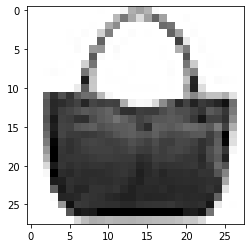

In [6]:
plt.imshow(train_img[100], cmap="Greys")
train_img[100].shape

In [7]:
train_img = train_img / 255.0
test_img = test_img / 255.0

In [8]:
# w, h = 28, 28
# train_img = train_img.reshape(train_img.shape[0], w, h, 1)
# test_img = test_img.reshape(test_img.shape[0], w, h, 1)

In [9]:
model = keras.models.Sequential([
    #keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((4,4)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=8, padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model = keras.models.Sequential()

# #model.add(tf.keras.layers.Conv2D(2,3, activation='relu', input_shape=(28,28,1)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
# model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
train_img.shape

(60000, 28, 28)

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
model.fit(train_img, train_label, epochs=5, batch_size=32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4679
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3565
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3197
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2948
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2777


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  803840    
_________________________________________________________________
dense_3 (Dense)              multiple                  10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.evaluate(test_img, test_label)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3503


0.35028555560112

In [14]:
classifications = model.predict(test_img)
classes = classifications.argmax(axis=-1)
print(classes[0])

9


In [15]:
print(test_label[0])

9
